# London House Price Data Machine Learning Project  

The point of this notebook is to expand on my supervised machine learning regression into a Kaggle dataset.



## Import packages

The first thing that I need to do is import all of the relevant packages that I will need to complete this problem.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn.model_selection import train_test_split
import copy
import math
%matplotlib inline


# Define the problem

Firstly I want to import, get brief descriptions about it and try to make sure that there is not any garbage

In [3]:
prices_raw = pd.read_csv('London.csv')
print(prices_raw.head())
print(prices_raw.describe())

   Unnamed: 0  Property Name    Price        House Type  Area in sq ft  \
0           0    Queens Road  1675000             House           2716   
1           1  Seward Street   650000  Flat / Apartment            814   
2           2    Hotham Road   735000  Flat / Apartment            761   
3           3   Festing Road  1765000             House           1986   
4           4   Spencer Walk   675000  Flat / Apartment            700   

   No. of Bedrooms  No. of Bathrooms  No. of Receptions     Location  \
0                5                 5                  5    Wimbledon   
1                2                 2                  2  Clerkenwell   
2                2                 2                  2       Putney   
3                4                 4                  4       Putney   
4                2                 2                  2       Putney   

  City/County Postal Code  
0      London    SW19 8NY  
1      London    EC1V 3PA  
2      London    SW15 1QL  
3      Lon

I am looking to focus initially on a price prediction model that focusses only on one variable.  Therefore, for my first pass at the data I will drop all columns except price and area, I am also scaling features so that they are of similar size.

In [4]:
price_area = prices_raw[['Price','Area in sq ft']]
price_area.loc[:, 'Price'] = (price_area['Price'].div(1000).round(0))
print(price_area.head())

   Price  Area in sq ft
0   1675           2716
1    650            814
2    735            761
3   1765           1986
4    675            700


I will also trim it to use a random sample as training data and the other as a prediciton tool.  I could also later try to compare it to random samples from Rightmove.


In [5]:
train, test = train_test_split(price_area,test_size= 0.8)
print(test.describe())
print(train.describe())

              Price  Area in sq ft
count   2784.000000    2784.000000
mean    1870.980963    1738.101293
std     2284.155010    1401.127419
min      180.000000     274.000000
25%      750.000000     840.000000
50%     1225.000000    1328.000000
75%     2150.000000    2194.000000
max    39750.000000   15405.000000
              Price  Area in sq ft
count    696.000000     696.000000
mean    1836.951149    1612.462644
std     2199.890889    1201.239938
min      250.000000     386.000000
25%      725.000000     819.750000
50%     1200.000000    1246.000000
75%     2150.000000    1999.250000
max    34000.000000   11716.000000


In [6]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


I think I need to convert the data to numpy arrays

In [7]:
x_train = train['Area in sq ft'].to_numpy()
y_train = train['Price'].to_numpy()

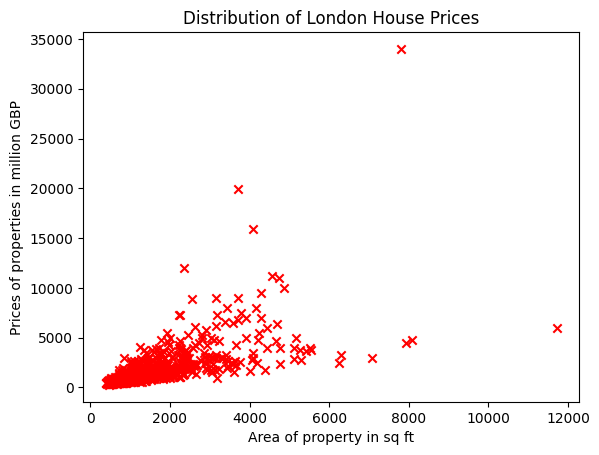

In [8]:
plt.scatter(x_train,y_train,marker = 'x', c='r')
plt.title('Distribution of London House Prices')
plt.ylabel('Prices of properties in million GBP')
plt.xlabel('Area of property in sq ft')
plt.show()

In [9]:
def compute_cost_funtion(x, y, w, b): 

    m = x.shape[0] 
    
    total_cost = 0
    
    cost_sum = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
        
    total_cost = cost_sum / ( 2 * m)
    
    return total_cost

In [10]:
# Compute cost with some initial values for paramaters w, b
initial_w = 1

initial_b = 1

cost = compute_cost_funtion(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost}')

<class 'numpy.float64'>
Cost at initial w: 1496255.8333333333


In [11]:
def compute_gradient_descent(x, y, w, b): 

    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        
        dj_dw_i = (f_wb - y[i]) * x[i]
        
        dj_db_i = f_wb - y[i]
        
        dj_db += dj_db_i
        
        dj_dw += dj_dw_i
    
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
         
        
    return dj_dw, dj_db

In [12]:
#testing with zero variables

initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient_descent(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -4627468.198275862 -1836.9511494252874


In [13]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = len(x)
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in) 
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [14]:
initial_w = 0
initial_b = 0

iterations =33
alpha = 0.001

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost_funtion, compute_gradient_descent, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 43243860931850.64   
Iteration    4: Cost 3068486770515177761357290392598606145126400.00   
Iteration    8: Cost 217732902994711531839384329033925820559060605776665272040141389402472448.00   
Iteration   12: Cost 15449835893718109118805773522916939025338283041755596022275446747615668771470714043394675517027254272.00   
Iteration   16: Cost 1096285521663292541099090163524160053465223016856474603816435307381094504008384048648271577150563211921368535584986648954106019840.00   
Iteration   20: Cost 77789948920895976946983927143386587580892933747178365318625418699077698659049276799172027207157992720660665227230828985414269143317188164716606181771134894080.00   
Iteration   24: Cost 5519799389427839460496681005569642356190170134513288198292495596941244118288127095311299583972870060030868073212701335431189475765042511547446951866001977776461775615483310163799928995840.00   
Iteration   28: Cost 391672519678743335665871387092356305343836322544165658859617857386972764594765

Cost is increasing with each iteration so learning changes need to be made.


In [15]:
initial_w = 0
initial_b = 0

iterations =100
alpha = 1e-6

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost_funtion, compute_gradient_descent, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 25955283.05   
Iteration   10: Cost 112033783138833280.00   
Iteration   20: Cost 512280285801560749144801280.00   
Iteration   30: Cost 2342428184355140814227728786719244288.00   
Iteration   40: Cost 10710874400087309829732832998314743677491085312.00   
Iteration   50: Cost 48976028883475876901664188399048078896625356212719845376.00   
Iteration   60: Cost 223945432986824794654504952133004360117515539201918701969669619712.00   
Iteration   70: Cost 1024002110807669695550380741017618098850322160947226827197015552968441724928.00   
Iteration   80: Cost 4682302777749595216244268339072540224596001089274335189844481409619449877869612761088.00   
Iteration   90: Cost 21410072373024508868589934416823973052628994991732585685803041332779697083301977460574424924160.00   
w,b found by gradient descent: -2.2890442504273227e+48 -9.134010255299342e+44


In [16]:
initial_w = 0
initial_b = 0

iterations =5000
alpha = 1e-10

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost_funtion, compute_gradient_descent, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 4101337.15   
Iteration  500: Cost 3221139.78   
Iteration 1000: Cost 2633584.44   
Iteration 1500: Cost 2241375.50   
Iteration 2000: Cost 1979565.52   
Iteration 2500: Cost 1804800.34   
Iteration 3000: Cost 1688139.89   
Iteration 3500: Cost 1610265.92   
Iteration 4000: Cost 1558282.95   
Iteration 4500: Cost 1523582.93   
w,b found by gradient descent: 0.9933698120440476 0.00039160848041997534


I am happy that I have found a learning rate which decreases over time, so now we experiment with iterations.

In [17]:
initial_w = 0
initial_b = 0

iterations =50000
alpha = 1e-10

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost_funtion, compute_gradient_descent, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 4101337.15   
Iteration 5000: Cost 1500419.73   
Iteration 10000: Cost 1454730.52   
Iteration 15000: Cost 1453927.91   
Iteration 20000: Cost 1453913.82   
Iteration 25000: Cost 1453913.57   
Iteration 30000: Cost 1453913.56   
Iteration 35000: Cost 1453913.56   
Iteration 40000: Cost 1453913.56   
Iteration 45000: Cost 1453913.56   
w,b found by gradient descent: 1.1451463312474057 0.00040917482291161705


Clearly too many but optimisation..

In [18]:
initial_w = 0
initial_b = 0

iterations =2000
alpha = 1e-10

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost_funtion, compute_gradient_descent, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 4101337.15   
Iteration  200: Cost 3706134.12   
Iteration  400: Cost 3369926.35   
Iteration  600: Cost 3083907.12   
Iteration  800: Cost 2840584.37   
Iteration 1000: Cost 2633584.44   
Iteration 1200: Cost 2457485.12   
Iteration 1400: Cost 2307673.61   
Iteration 1600: Cost 2180225.72   
Iteration 1800: Cost 2071803.04   
w,b found by gradient descent: 0.6348782301606131 0.00025142549357134184


Looks like we have a solution of w = 0.64  and b = 0.0002.  I will now attempt to draw the line from this on top of the training dataset.

In [19]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b


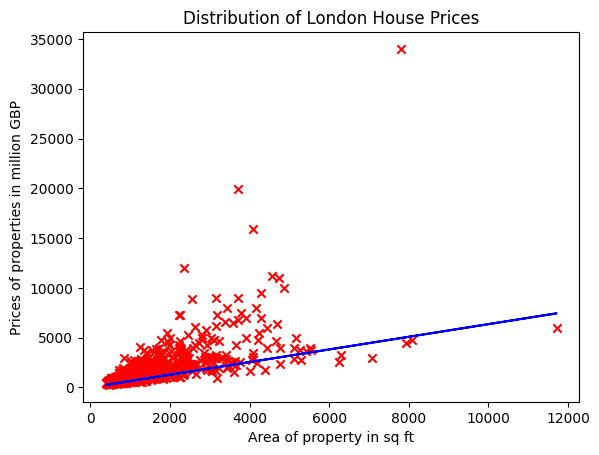

In [20]:
plt.plot(x_train, predicted, c = "b")

plt.scatter(x_train, y_train, marker='x', c='r') 

plt.title('Distribution of London House Prices')
plt.ylabel('Prices of properties in million GBP')
plt.xlabel('Area of property in sq ft')
plt.show()


Graph above looks like we have a believeable trend line based on the relationship of these two factors.

I will now try to test my values of w,b against the remainiing test data that I have so far not used..

In [21]:
x_test = test['Area in sq ft'].to_numpy()
y_test = test['Price'].to_numpy()

In [22]:

def test_model(X, w, b, y=None):

    X = X.reshape(-1, 1)
    w = np.array([w])
    m = X.shape[0]  # number of examples
    
    predictions = np.dot(X, w) + b
    
    print("Model Summary Statistics:")
    print(f"Number of examples: {X.shape[0]}")
    print(f"Number of features: {X.shape[1]}")
    
    print("\nPrediction Statistics:")
    print(f"Mean prediction: {np.mean(predictions):.4f}")
    print(f"Median prediction: {np.median(predictions):.4f}")
    print(f"Min prediction: {np.min(predictions):.4f}")
    print(f"Max prediction: {np.max(predictions):.4f}")
    
    if y is not None:
        errors = predictions - y
        mse = np.mean(errors**2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(errors))
        r2 = 1 - (np.sum(errors**2) / np.sum((y - np.mean(y))**2))
        
        print("\nError Metrics:")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"R-squared (R2) Score: {r2:.4f}")
        
        print("\nError Statistics:")
        print(f"Mean error: {np.mean(errors):.4f}")
        print(f"Median error: {np.median(errors):.4f}")
        print(f"Min error: {np.min(errors):.4f}")
        print(f"Max error: {np.max(errors):.4f}")
    
    return predictions


predictions = test_model(x_test, w, b, y_test)

Model Summary Statistics:
Number of examples: 2784
Number of features: 1

Prediction Statistics:
Mean prediction: 1103.4829
Median prediction: 843.1185
Min prediction: 173.9569
Max prediction: 9780.2994

Error Metrics:
Mean Squared Error (MSE): 3848170.2187
Root Mean Squared Error (RMSE): 1961.6754
Mean Absolute Error (MAE): 847.4345
R-squared (R2) Score: 0.2622

Error Statistics:
Mean error: -767.4980
Median error: -286.1387
Min error: -36180.0795
Max error: 3532.5464


All of these error metrics show that this model is not very good at predicting house prices in London.  However, this is to be expected because the data is not going to be very well correlated given the fact some are flats, area diffences and potentially time differences between sold prices.

I think I will try to do the same analysis again but with more features and differential the data in some way before processing the regression.